<a href="https://colab.research.google.com/github/ReanSchwarzer1/Asia-Uni-Final-Group2-Project/blob/main/asia_uni_group_project_age_gender_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Asia Uni Group Project (Age-gender Classification)

## Group 2 Final Project
#### Kaggle dataset link: https://www.kaggle.com/nipunarora8/age-gender-and-ethnicity-face-data-csv/code


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/age-gender-and-ethnicity-face-data-csv/age_gender.csv


In [ ]:
import os # accessing directory structure
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt # plotting
%matplotlib inline

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from  IPython.display import display
import plotly.express as px

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, experimental, MaxPool2D, BatchNormalization
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau 
from tensorflow.data import Dataset
from tensorflow.keras import Input, Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.random import set_seed
from tensorflow.keras.utils import to_categorical
from tensorflow import test
import random

# Set Seed
np.random.seed(11)
set_seed(11)
random.seed(11)

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
age_gender_data = pd.read_csv("/kaggle/input/age-gender-and-ethnicity-face-data-csv/age_gender.csv")
age_gender_data.info()

/kaggle/input/age-gender-and-ethnicity-face-data-csv/age_gender.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


## Exploratory Data Analysis

In [ ]:
age_gender_data.head(10)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
5,1,2,0,20161220144957407.jpg.chip.jpg,195 198 200 200 198 198 199 199 198 197 197 19...
6,1,2,0,20161220145040127.jpg.chip.jpg,208 216 217 219 222 223 222 221 220 220 221 22...
7,1,2,0,20170109191125532.jpg.chip.jpg,99 142 169 177 179 181 183 186 187 186 191 190...
8,1,2,0,20161219222749039.jpg.chip.jpg,127 127 133 140 143 148 152 157 160 165 172 17...
9,1,2,0,20170109191209991.jpg.chip.jpg,199 211 211 214 216 216 219 221 222 224 219 21...


In [ ]:
age_gender_data.tail(10)

,age,ethnicity,gender,img_name,pixels
23695,96,0,1,20170110173805290.jpg.chip.jpg,133 136 154 153 165 142 140 157 163 141 152 15...
23696,99,0,0,20170117195137161.jpg.chip.jpg,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
23697,99,0,1,20170113013141679.jpg.chip.jpg,114 127 154 173 188 196 212 217 217 207 195 19...
23698,99,0,1,20170120133837030.jpg.chip.jpg,234 229 217 187 205 210 217 204 183 166 169 16...
23699,99,0,1,20170120134718759.jpg.chip.jpg,206 183 141 116 117 120 110 103 104 111 111 11...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...
23704,99,0,1,20170110182052119.jpg.chip.jpg,156 161 160 165 170 173 166 177 183 191 187 18...


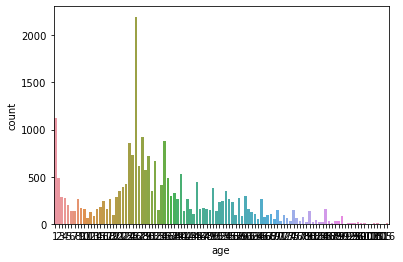

In [ ]:
sns.countplot(x='age', data=age_gender_data)
sns.set()

<AxesSubplot:xlabel='gender', ylabel='count'>

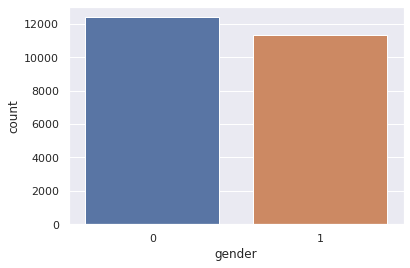

In [ ]:
sns.countplot(x='gender', data=age_gender_data) #gender distribution

In [ ]:
age_gender_data.reset_index(drop=True, inplace=True)
age_gender_data

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [ ]:
age_gender_data.isnull().sum() # Check null data

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

#### There is no null data

In [ ]:
# Input image configuration
num_pixels = len(age_gender_data['pixels'][0].split(' '))
dimension = int(np.sqrt(num_pixels))
img_width = dimension
img_height = dimension

print("Pixels: {}".format(num_pixels))
print("Width: {0}, Height: {1}".format(img_width, img_height))

Pixels: 2304
Width: 48, Height: 48


## Test-train split

In [ ]:
# Splitting dataset into X and y
X_img = age_gender_data.iloc[:,4].copy()
y_age = age_gender_data.iloc[:,0].copy()
y_ethnicity = age_gender_data.iloc[:,1].copy()
y_gender = age_gender_data.iloc[:,2].copy()

# splitting the data into train and te sets.
X_train, X_te, y_train, y_te = train_test_split(X_img,y_gender,test_size=0.3,random_state=11)
# splitting 'te' set into validation and test set
X_val, X_test, y_val, y_test = train_test_split(X_te,y_te,test_size=0.15,random_state=11)

def str_to_npArr(x):
    '''
    Function to convert pixel data (string) into numpy_array of pixels
    '''
    x = x.reset_index(drop=True)
    x = x.apply(lambda x: np.array(x.split(), dtype="float32")) #converting data to numpy array
    return np.array([x[i].reshape(img_width, img_height, 1) for i in range(x.shape[0])])

# Converting the string of pixels into image array for each of train, val and test set and normalization
X_train = str_to_npArr(X_train)
X_test = str_to_npArr(X_test)
X_val = str_to_npArr(X_val)

print("Traget: shape = (16593, 48, 48, 1), type = <class 'numpy.ndarray'>")
print("Current: shape = {}, type = {}".format(X_train.shape, type(X_train)))

Traget: shape = (16593, 48, 48, 1), type = <class 'numpy.ndarray'>
Current: shape = (16593, 48, 48, 1), type = <class 'numpy.ndarray'>


In [ ]:
target_columns = ['gender', 'ethnicity', 'age']

age_gender_data_preprocess = age_gender_data.drop('img_name', axis=1)
y = age_gender_data_preprocess[target_columns]
X = age_gender_data_preprocess.drop(target_columns, axis=1)

print(X)
print("...................................................................")
print(y)

                                                  pixels
0      129 128 128 126 127 130 133 135 139 142 145 14...
1      164 74 111 168 169 171 175 182 184 188 193 199...
2      67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3      193 197 198 200 199 200 202 203 204 205 208 21...
4      202 205 209 210 209 209 210 211 212 214 218 21...
...                                                  ...
23700  127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701  23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702  59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703  45 108 120 156 206 197 140 180 191 199 204 207...
23704  156 161 160 165 170 173 166 177 183 191 187 18...

[23705 rows x 1 columns]
...................................................................
       gender  ethnicity  age
0           0          2    1
1           0          2    1
2           0          2    1
3           0          2    1
4           0          2    1
...       ...        ...  ...
23700       

In [ ]:
X = X['pixels'].apply(lambda x: np.array(x.split(), dtype="float32")) #converting data to numpy array
X = np.array(X)/255.0 # normalization
X = np.array([ X[i].reshape(48,48,1) for i in range(X.shape[0]) ])

print("Traget: X Shape: {}".format(X.shape))
print("Current: X Shape: {}".format(X.shape))

Traget: X Shape: (23705, 48, 48, 1)
Current: X Shape: (23705, 48, 48, 1)


In [ ]:
y_gender = np.array(y['gender'])
y_ethnicity = np.array(y['ethnicity'])
y_age = np.array(y['age'])

## Visualizing the data

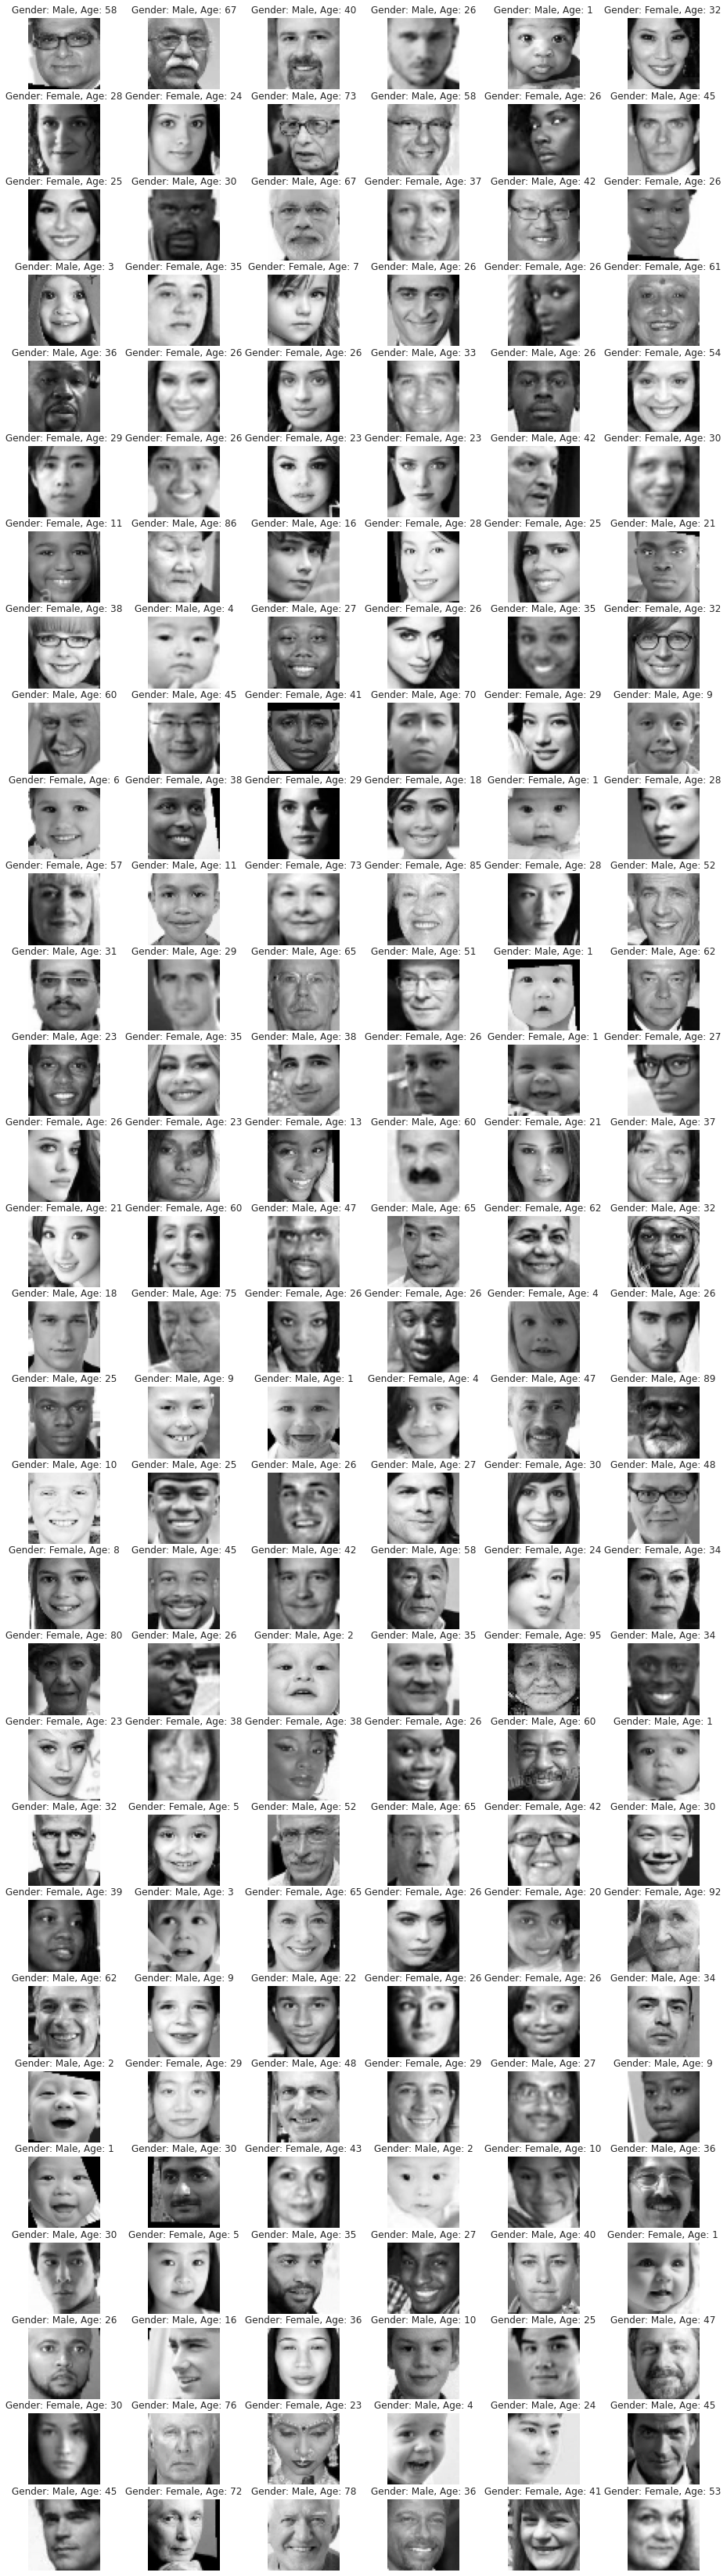

In [ ]:
rows = 30 # rows in subplots
cols = 6 # columns in subplots
samp = random.sample(range(X.shape[0]),rows*cols) #selecting 100 random samples
x_samp = X[samp,:,:,:]
y_samp_gender = y_gender[samp]
y_samp_age = y_age[samp]
    
fig,ax = plt.subplots(rows,cols,figsize=(16,60))
r = 0
c = 0   

for i in range(rows*cols):
    aa = x_samp[i,:,:,:].reshape(48,48)
    ax[r,c].axis("off")
    ax[r,c].imshow(aa,cmap="gray")
    ax[r,c].set_title(f"Gender: {'Female' if y_samp_gender[i]==1 else 'Male'}, Age: {y_samp_age[i]}")
    c+=1
    if c == cols:
        c=0
        r+=1
        
plt.show()

## Data Augmentation (to improve train accuracy & to get more data)

In [ ]:
train_data_gen = ImageDataGenerator(rotation_range=30,
                                   width_shift_range=1,
                                    brightness_range=[0.8,1.2],
                                    zoom_range=[0.8,1.2],
                                    rescale=1/255
                                   )
val_data_gen = ImageDataGenerator(rescale=1/255)

test_data_gen = ImageDataGenerator(rescale=1/255)

set_seed(11)
random.seed(11)
np.random.seed(11)

val_data = val_data_gen.flow(X_val,y_val,
                                   seed=11,shuffle=False)

test_data = test_data_gen.flow(X_test,y_test,
                                   seed=11,shuffle=False)

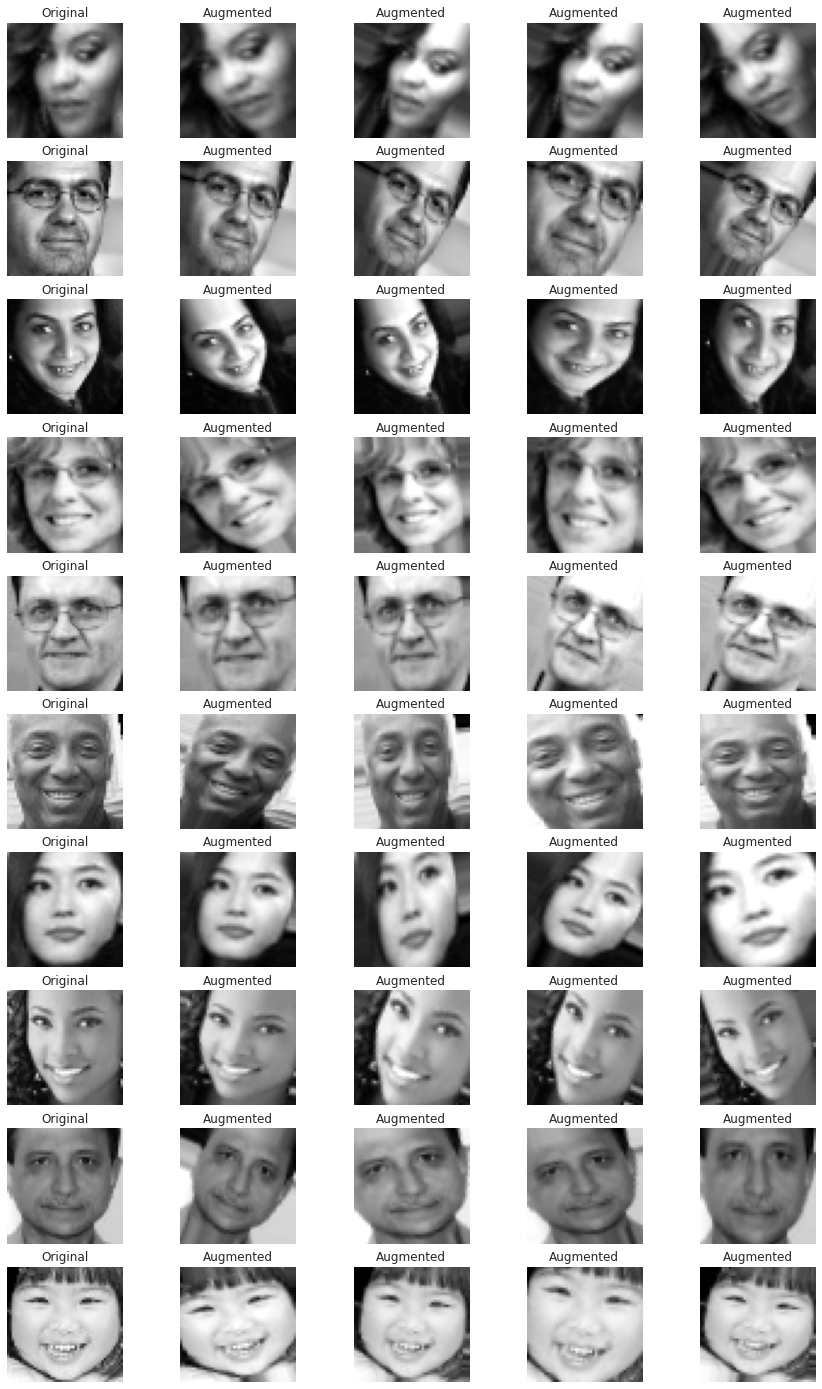

In [ ]:
fig,ax = plt.subplots(10,5,figsize=(15,25))
for n in range(10):    
    r = random.sample(range(X.shape[0]),1)[0]
    ax[n,0].imshow(X[r].reshape(48,48),cmap="gray")
    ax[n,0].set_title("Original")
    ax[n,0].axis("off")
    for i in range(1,5):
        ax[n,i].imshow(train_data_gen.random_transform(X[r]).reshape(48,48),cmap="gray")
        ax[n,i].set_title("Augmented")
        ax[n,i].axis("off")
plt.show()

## Training the CNN model

In [ ]:
# Model configuration
batch_size = 32
img_width, img_height, img_num_channels = 48, 48, 1
loss_function = sparse_categorical_crossentropy
no_classes = 2
no_epochs = 9
optimizer = Adam()
verbosity = 1
num_folds = 10
activation='softmax'

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)
input_shape

(48, 48, 1)

In [ ]:
# Set Seed
random.seed(11)
set_seed(11)
np.random.seed(11)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

In [ ]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, y_gender):
    
  # Set Seed
  random.seed(11)
  set_seed(11)
  np.random.seed(11)
  
  # Define the model architecture
  model = Sequential()
  
  model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())

  model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))
  model.add(BatchNormalization())

  model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))
  model.add(BatchNormalization())

  model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='softmax'))

  # Compile the model
  model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
  
  # Generate a print
  print('..........................................................................')
  print(f'Training for fold {fold_no} ...')
    
  early_stop = EarlyStopping(monitor="val_loss",patience=5,mode="min") # Ensure the model doesn't overfit
  
  # Set Seed
  random.seed(11)
  set_seed(11)
  np.random.seed(11)
    
  # Fit data to model
  history = model.fit(train_data_gen.flow(X[train], y_gender[train], seed=11),
            callbacks=early_stop,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_data=train_data_gen.flow(X[test], y_gender[test],
                                   seed=11))
  
  # Generate generalization metrics
  fig = px.line(
  history.history, y=['loss', 'val_loss'],
  labels={'index': 'epoch', 'value': 'loss'}, 
  title='Training History')
  fig.show()
    
  scores = model.evaluate(train_data_gen.flow(X[test], y_gender[test],
                                   seed=11), verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  
  # Increase fold number
  fold_no = fold_no + 1

..........................................................................
Training for fold 1 ...
Epoch 1/9
667/667 [==============================] - 21s 25ms/step - loss: 0.9204 - accuracy: 0.6648 - val_loss: 0.5147 - val_accuracy: 0.7381
Epoch 2/9
667/667 [==============================] - 15s 23ms/step - loss: 0.4065 - accuracy: 0.8150 - val_loss: 0.3771 - val_accuracy: 0.8296
Epoch 3/9
667/667 [==============================] - 16s 24ms/step - loss: 0.3784 - accuracy: 0.8256 - val_loss: 0.4009 - val_accuracy: 0.8127
Epoch 4/9
667/667 [==============================] - 15s 23ms/step - loss: 0.3454 - accuracy: 0.8448 - val_loss: 0.3692 - val_accuracy: 0.8368
Epoch 5/9
667/667 [==============================] - 16s 24ms/step - loss: 0.3271 - accuracy: 0.8532 - val_loss: 0.3264 - val_accuracy: 0.8617
Epoch 6/9
667/667 [==============================] - 15s 23ms/step - loss: 0.3186 - accuracy: 0.8571 - val_loss: 0.3562 - val_accuracy: 0.8385
Epoch 7/9
667/667 [========================

Score for fold 1: loss of 0.2913067042827606; accuracy of 86.88316941261292%
..........................................................................
Training for fold 2 ...
Epoch 1/9
667/667 [==============================] - 17s 24ms/step - loss: 0.8610 - accuracy: 0.6319 - val_loss: 0.5406 - val_accuracy: 0.7714
Epoch 2/9
667/667 [==============================] - 15s 23ms/step - loss: 0.4754 - accuracy: 0.7760 - val_loss: 0.4283 - val_accuracy: 0.7938
Epoch 3/9
667/667 [==============================] - 16s 25ms/step - loss: 0.4049 - accuracy: 0.8112 - val_loss: 0.3794 - val_accuracy: 0.8309
Epoch 4/9
667/667 [==============================] - 15s 23ms/step - loss: 0.3699 - accuracy: 0.8288 - val_loss: 0.3313 - val_accuracy: 0.8558
Epoch 5/9
667/667 [==============================] - 16s 24ms/step - loss: 0.3487 - accuracy: 0.8410 - val_loss: 0.3131 - val_accuracy: 0.8536
Epoch 6/9
667/667 [==============================] - 16s 24ms/step - loss: 0.3296 - accuracy: 0.8541 - val_lo

Score for fold 2: loss of 0.2808069884777069; accuracy of 87.51581907272339%
..........................................................................
Training for fold 3 ...
Epoch 1/9
667/667 [==============================] - 17s 24ms/step - loss: 0.8616 - accuracy: 0.6547 - val_loss: 0.4916 - val_accuracy: 0.7668
Epoch 2/9
667/667 [==============================] - 16s 24ms/step - loss: 0.4521 - accuracy: 0.7910 - val_loss: 0.4179 - val_accuracy: 0.8216
Epoch 3/9
667/667 [==============================] - 16s 23ms/step - loss: 0.4093 - accuracy: 0.8105 - val_loss: 0.4450 - val_accuracy: 0.8018
Epoch 4/9
667/667 [==============================] - 16s 24ms/step - loss: 0.3748 - accuracy: 0.8237 - val_loss: 0.3474 - val_accuracy: 0.8524
Epoch 5/9
667/667 [==============================] - 16s 24ms/step - loss: 0.3555 - accuracy: 0.8365 - val_loss: 0.3826 - val_accuracy: 0.8389
Epoch 6/9
667/667 [==============================] - 16s 25ms/step - loss: 0.3298 - accuracy: 0.8509 - val_lo

Score for fold 3: loss of 0.29008299112319946; accuracy of 87.68452405929565%
..........................................................................
Training for fold 4 ...
Epoch 1/9
667/667 [==============================] - 16s 23ms/step - loss: 0.8646 - accuracy: 0.6385 - val_loss: 0.5561 - val_accuracy: 0.7246
Epoch 2/9
667/667 [==============================] - 16s 24ms/step - loss: 0.4607 - accuracy: 0.7855 - val_loss: 0.4519 - val_accuracy: 0.7908
Epoch 3/9
667/667 [==============================] - 15s 23ms/step - loss: 0.4025 - accuracy: 0.8168 - val_loss: 0.4534 - val_accuracy: 0.7841
Epoch 4/9
667/667 [==============================] - 16s 24ms/step - loss: 0.3670 - accuracy: 0.8323 - val_loss: 0.3444 - val_accuracy: 0.8402
Epoch 5/9
667/667 [==============================] - 15s 23ms/step - loss: 0.3401 - accuracy: 0.8466 - val_loss: 0.3380 - val_accuracy: 0.8410
Epoch 6/9
667/667 [==============================] - 16s 24ms/step - loss: 0.3250 - accuracy: 0.8554 - val_l

Score for fold 4: loss of 0.30911535024642944; accuracy of 85.70223450660706%
..........................................................................
Training for fold 5 ...
Epoch 1/9
667/667 [==============================] - 17s 25ms/step - loss: 0.8815 - accuracy: 0.6278 - val_loss: 0.5558 - val_accuracy: 0.7136
Epoch 2/9
667/667 [==============================] - 15s 23ms/step - loss: 0.4894 - accuracy: 0.7688 - val_loss: 0.4350 - val_accuracy: 0.8001
Epoch 3/9
667/667 [==============================] - 16s 24ms/step - loss: 0.4075 - accuracy: 0.8102 - val_loss: 0.4143 - val_accuracy: 0.8005
Epoch 4/9
667/667 [==============================] - 16s 23ms/step - loss: 0.3728 - accuracy: 0.8273 - val_loss: 0.3589 - val_accuracy: 0.8448
Epoch 5/9
667/667 [==============================] - 16s 24ms/step - loss: 0.3572 - accuracy: 0.8355 - val_loss: 0.3394 - val_accuracy: 0.8545
Epoch 6/9
667/667 [==============================] - 16s 24ms/step - loss: 0.3247 - accuracy: 0.8529 - val_l

Score for fold 5: loss of 0.3133346438407898; accuracy of 86.54575943946838%
..........................................................................
Training for fold 6 ...
Epoch 1/9
667/667 [==============================] - 17s 24ms/step - loss: 0.8769 - accuracy: 0.6334 - val_loss: 0.6754 - val_accuracy: 0.6051
Epoch 2/9
667/667 [==============================] - 16s 24ms/step - loss: 0.4747 - accuracy: 0.7758 - val_loss: 0.4273 - val_accuracy: 0.8046
Epoch 3/9
667/667 [==============================] - 16s 24ms/step - loss: 0.4096 - accuracy: 0.8136 - val_loss: 0.3886 - val_accuracy: 0.8173
Epoch 4/9
667/667 [==============================] - 16s 24ms/step - loss: 0.3700 - accuracy: 0.8314 - val_loss: 0.4322 - val_accuracy: 0.8173
Epoch 5/9
667/667 [==============================] - 16s 23ms/step - loss: 0.3527 - accuracy: 0.8422 - val_loss: 0.3421 - val_accuracy: 0.8498
Epoch 6/9
667/667 [==============================] - 16s 23ms/step - loss: 0.3323 - accuracy: 0.8498 - val_lo

Score for fold 6: loss of 0.3437589108943939; accuracy of 85.1054847240448%
..........................................................................
Training for fold 7 ...
Epoch 1/9
667/667 [==============================] - 18s 24ms/step - loss: 0.8449 - accuracy: 0.6470 - val_loss: 0.5523 - val_accuracy: 0.7325
Epoch 2/9
667/667 [==============================] - 15s 23ms/step - loss: 0.4401 - accuracy: 0.7980 - val_loss: 0.3886 - val_accuracy: 0.8156
Epoch 3/9
667/667 [==============================] - 17s 25ms/step - loss: 0.4077 - accuracy: 0.8165 - val_loss: 0.4048 - val_accuracy: 0.8046
Epoch 4/9
667/667 [==============================] - 16s 23ms/step - loss: 0.3604 - accuracy: 0.8352 - val_loss: 0.4101 - val_accuracy: 0.8160
Epoch 5/9
667/667 [==============================] - 16s 24ms/step - loss: 0.3365 - accuracy: 0.8477 - val_loss: 0.3345 - val_accuracy: 0.8494
Epoch 6/9
667/667 [==============================] - 15s 23ms/step - loss: 0.3247 - accuracy: 0.8557 - val_los

Score for fold 7: loss of 0.2831076979637146; accuracy of 86.91983222961426%
..........................................................................
Training for fold 8 ...
Epoch 1/9
667/667 [==============================] - 16s 23ms/step - loss: 0.8670 - accuracy: 0.6487 - val_loss: 0.6423 - val_accuracy: 0.6886
Epoch 2/9
667/667 [==============================] - 16s 25ms/step - loss: 0.4578 - accuracy: 0.7863 - val_loss: 0.4208 - val_accuracy: 0.8046
Epoch 3/9
667/667 [==============================] - 16s 23ms/step - loss: 0.3951 - accuracy: 0.8172 - val_loss: 0.4131 - val_accuracy: 0.8063
Epoch 4/9
667/667 [==============================] - 16s 24ms/step - loss: 0.3663 - accuracy: 0.8319 - val_loss: 0.3475 - val_accuracy: 0.8414
Epoch 5/9
667/667 [==============================] - 16s 23ms/step - loss: 0.3413 - accuracy: 0.8454 - val_loss: 0.3937 - val_accuracy: 0.8143
Epoch 6/9
667/667 [==============================] - 17s 25ms/step - loss: 0.3274 - accuracy: 0.8529 - val_lo

Score for fold 8: loss of 0.32746660709381104; accuracy of 84.59915518760681%
..........................................................................
Training for fold 9 ...
Epoch 1/9
667/667 [==============================] - 18s 25ms/step - loss: 0.8468 - accuracy: 0.6374 - val_loss: 0.7512 - val_accuracy: 0.5515
Epoch 2/9
667/667 [==============================] - 17s 25ms/step - loss: 0.4673 - accuracy: 0.7830 - val_loss: 0.4052 - val_accuracy: 0.8190
Epoch 3/9
667/667 [==============================] - 16s 24ms/step - loss: 0.3931 - accuracy: 0.8199 - val_loss: 0.4679 - val_accuracy: 0.7671
Epoch 4/9
667/667 [==============================] - 16s 24ms/step - loss: 0.3735 - accuracy: 0.8277 - val_loss: 0.3776 - val_accuracy: 0.8350
Epoch 5/9
667/667 [==============================] - 16s 24ms/step - loss: 0.3494 - accuracy: 0.8418 - val_loss: 0.3791 - val_accuracy: 0.8274
Epoch 6/9
667/667 [==============================] - 17s 25ms/step - loss: 0.3246 - accuracy: 0.8542 - val_l

Score for fold 9: loss of 0.3101481795310974; accuracy of 87.13080286979675%
..........................................................................
Training for fold 10 ...
Epoch 1/9
667/667 [==============================] - 17s 25ms/step - loss: 0.8446 - accuracy: 0.6594 - val_loss: 0.4936 - val_accuracy: 0.7646
Epoch 2/9
667/667 [==============================] - 16s 24ms/step - loss: 0.4534 - accuracy: 0.7865 - val_loss: 0.4396 - val_accuracy: 0.8173
Epoch 3/9
667/667 [==============================] - 17s 25ms/step - loss: 0.4005 - accuracy: 0.8172 - val_loss: 0.3396 - val_accuracy: 0.8544
Epoch 4/9
667/667 [==============================] - 16s 24ms/step - loss: 0.3709 - accuracy: 0.8279 - val_loss: 0.4138 - val_accuracy: 0.8080
Epoch 5/9
667/667 [==============================] - 16s 24ms/step - loss: 0.3457 - accuracy: 0.8408 - val_loss: 0.3096 - val_accuracy: 0.8696
Epoch 6/9
667/667 [==============================] - 16s 24ms/step - loss: 0.3331 - accuracy: 0.8464 - val_l

Score for fold 10: loss of 0.2884615957736969; accuracy of 87.13080286979675%


### Model scores

In [ ]:
# == Provide average scores ==
print('..........................................................................')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('//////////////////////////////////////////////////////////////////////////')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('..........................................................................')

..........................................................................
Score per fold
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
> Fold 1 - Loss: 0.2913067042827606 - Accuracy: 86.88316941261292%
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
> Fold 2 - Loss: 0.2808069884777069 - Accuracy: 87.51581907272339%
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
> Fold 3 - Loss: 0.29008299112319946 - Accuracy: 87.68452405929565%
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
> Fold 4 - Loss: 0.30911535024642944 - Accuracy: 85.70223450660706%
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
> Fold 5 - Loss: 0.3133346438407898 - Accuracy: 86.54575943946838%
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
> Fold 6 - Loss: 0.3437589108943939 - Accuracy: 85.1054847240448%
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
> Fold 7 - Loss: 0.2831076979637146 - Accuracy: 86.91983222961426%
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
> Fold 8 - Loss: 0.32746660709381104 - Accuracy: 84.59915518760681%
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
> Fold 9 - Loss: 0.3101481795310974 - A

In [ ]:
# Set Seed
random.seed(11)
set_seed(11)
np.random.seed(11)
  
# Define the model architecture
model = Sequential()
  
model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='softmax'))

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
Final_train = np.append(X_train, X_val, axis=0)
Final_val = np.append(y_train, y_val, axis=0)
final_training_data = train_data_gen.flow(Final_train, Final_val,
                                   seed=11)

random.seed(11)
set_seed(11)
np.random.seed(11)
final_model_history = model.fit(train_data_gen.flow(X, y_gender, seed=11),batch_size=32,epochs=5, validation_data=val_data)

Epoch 1/5
741/741 [==============================] - 18s 23ms/step - loss: 0.8533 - accuracy: 0.6299 - val_loss: 0.4976 - val_accuracy: 0.7816
Epoch 2/5
741/741 [==============================] - 18s 24ms/step - loss: 0.4536 - accuracy: 0.7900 - val_loss: 0.3635 - val_accuracy: 0.8450
Epoch 3/5
741/741 [==============================] - 17s 23ms/step - loss: 0.3933 - accuracy: 0.8235 - val_loss: 0.3719 - val_accuracy: 0.8304
Epoch 4/5
741/741 [==============================] - 17s 23ms/step - loss: 0.3622 - accuracy: 0.8374 - val_loss: 0.3473 - val_accuracy: 0.8505
Epoch 5/5
741/741 [==============================] - 17s 23ms/step - loss: 0.3456 - accuracy: 0.8379 - val_loss: 0.3462 - val_accuracy: 0.8556


## Training history graphs

In [ ]:
# Generate generalization metrics
fig = px.line(
final_model_history.history, y=['loss', 'val_loss'],
labels={'index': 'epoch', 'value': 'val_loss'}, 
title='Training History')
fig.show()


# Generate generalization metrics
fig = px.line(
final_model_history.history, y=['accuracy', 'val_accuracy'],
labels={'index': 'epoch', 'value': 'accuracy'}, 
title='Training History')
fig.show()

## Model Evaluation

In [ ]:
# Metrics
model.evaluate(test_data)

34/34 [==============================] - 0s 7ms/step - loss: 0.3521 - accuracy: 0.8519


[0.3521018922328949, 0.8519212603569031]

In [ ]:
y_pred = model.predict_classes(test_data)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



F1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)
In the multi-class and multi-label case, this is the average of the F1 score of each class with weighting depending on the average parameter.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       530
           1       0.88      0.82      0.85       537

    accuracy                           0.85      1067
   macro avg       0.85      0.85      0.85      1067
weighted avg       0.85      0.85      0.85      1067



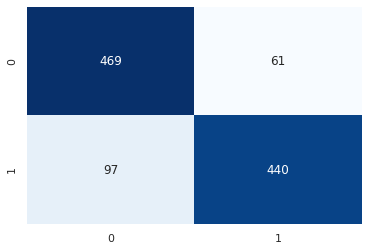

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Blues', cbar=False, annot=True, fmt='d');

## Error analysis

In [ ]:
error_index = (y_test != y_pred)#finding error indices
y_test_error = y_test[error_index]
X_test_error = X_test[error_index]
prediction_error = y_pred[error_index]

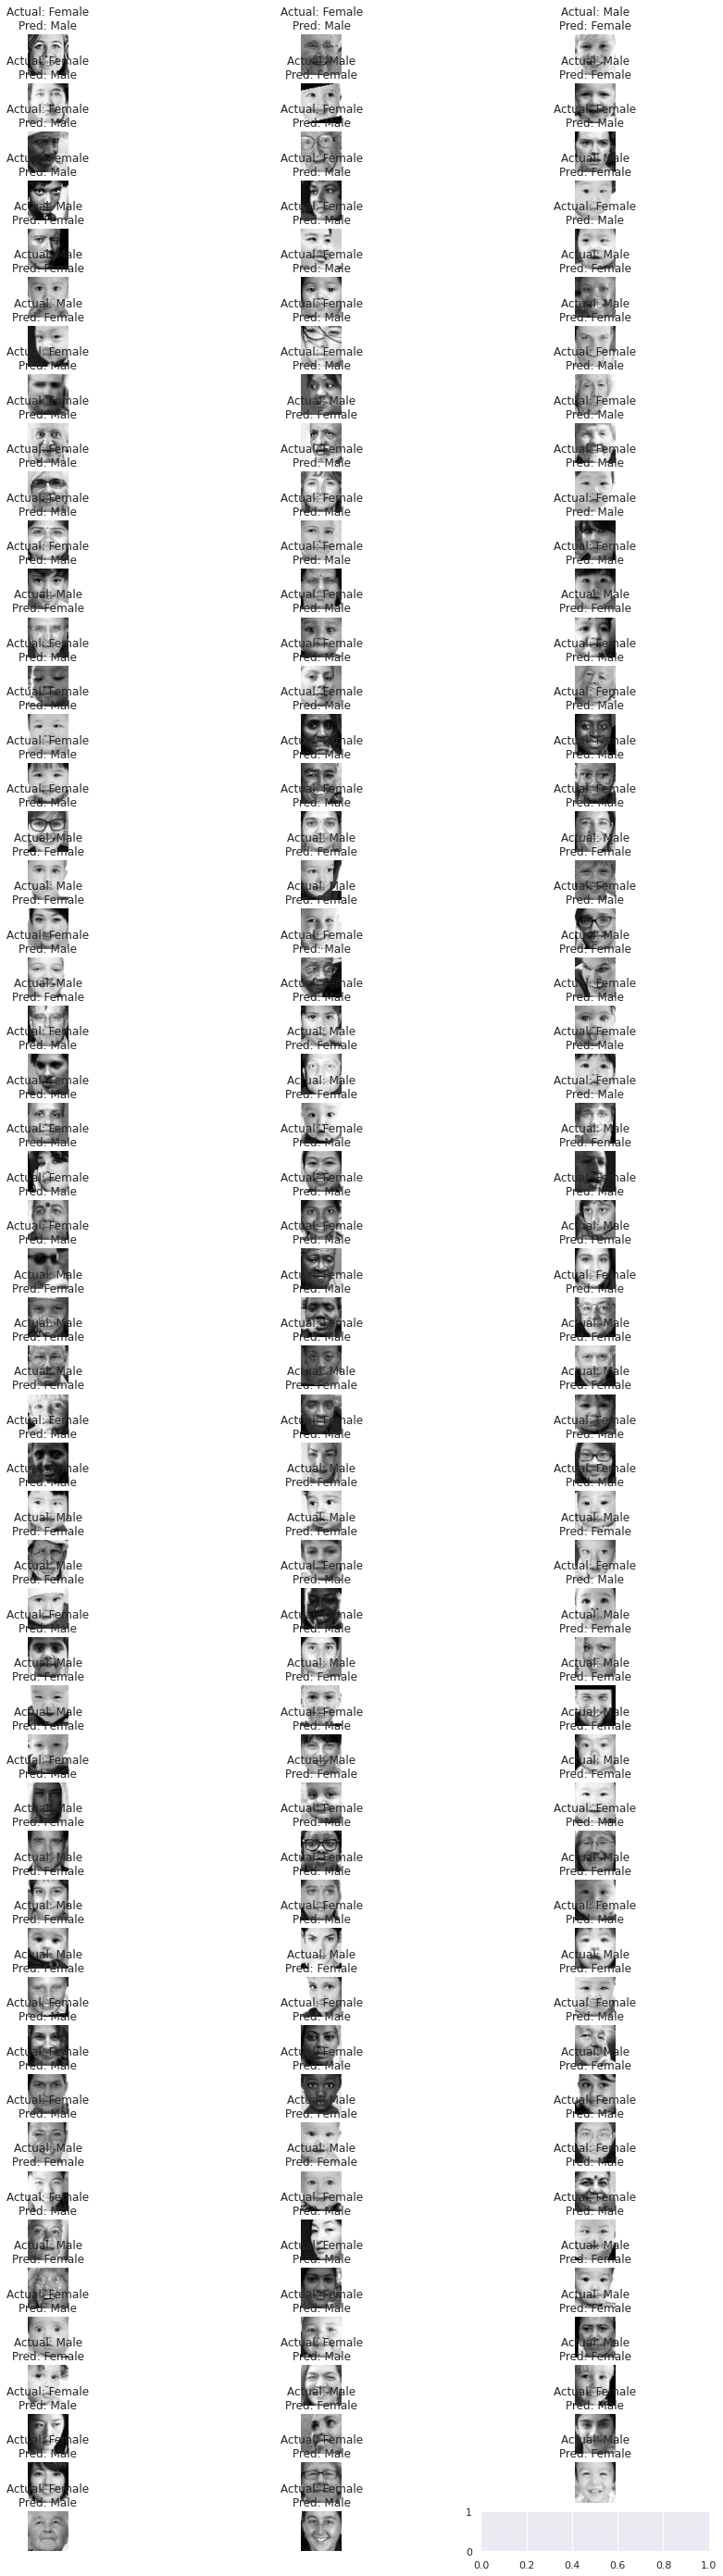

In [ ]:
rows=int(np.floor(sum(error_index)/3)) #rows in subplots
cols=3 #columns in subplots
x_samp = X_test_error
y_samp = y_test_error

fig,ax = plt.subplots(rows,cols,figsize=(15,50))
r = 0
c = 0
for i in range((rows*cols)-1):
    aa = x_samp[i].reshape(48,48)
    ax[r,c].axis("off")
    ax[r,c].imshow(aa,cmap="gray")
    actual_lab = "Female" if y_samp.iloc[i]==1 else "Male"
    pred_lab = "Female" if int(prediction_error[i])==1 else "Male"
    ax[r,c].set_title(f'Actual: {actual_lab}\nPred: {pred_lab}')
    c+=1
    if c == cols:
        c=0
        r+=1
plt.show()

## Predicting my own image

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



male


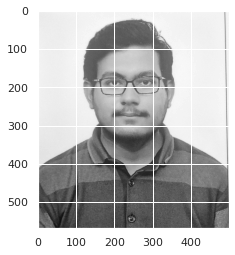

In [ ]:
import cv2
img = cv2.imread('../input/my-image/img.jpg', 0)
plt.imshow(img, cmap="gray")
img = cv2.resize(img, (48,48))
img = np.reshape(img,[1,48,48,1])
img_pixels = img.astype("float32") / 255.0
classes = model.predict_classes(img_pixels)

mapper=['male','female']
print(mapper[classes[0]])